This example shows using a simple cotengra optimizer to find a contraction 
tree for a quantum circuit amplitude, using the high level interface of `quimb`.

In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn
import cotengra as ctg

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# get the circuit
circ = qtn.Circuit.from_qasm_file('circuit_n53_m20_s0_e0_pABCDCDAB.qsim')
circ

<Circuit(n=53, num_gates=3263, gate_opts={'contract': 'auto-split-gate', 'propagate_tags': 'register'})>

In [3]:
# the contraction optimizer
opt = ctg.HyperOptimizer(
    reconf_opts={},
    parallel=True,
    progbar=True,
)

In [4]:
# we can supply it anywhere that takes an `optimize` kwarg:
rehs = circ.amplitude_rehearse(optimize=opt)

log2[SIZE]: 52.00 log10[FLOPs]: 18.66: 100%|█████| 128/128 [01:00<00:00,  2.13it/s]


In [5]:
# get the core information
width = rehs['W']
cost = rehs['C']

# n.b. discrepency with flops above is that `opt_einsum` reports
# flops assuming real dtype (2 * cost), complex would be (8 * cost)
width, cost

(52.0, 18.35902105132412)

# inspecting:

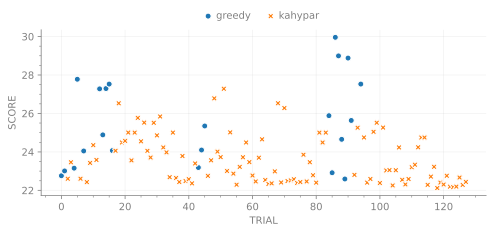

(<Figure size 800x300 with 1 Axes>, <Axes: xlabel='TRIAL', ylabel='SCORE'>)

In [6]:
opt.plot_trials()

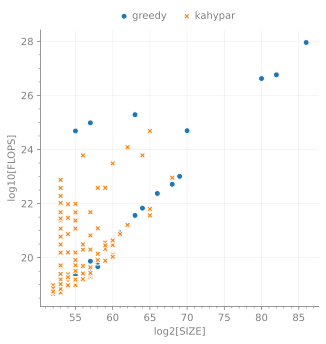

(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='log2[SIZE]', ylabel='log10[FLOPS]'>)

In [7]:
opt.plot_scatter()

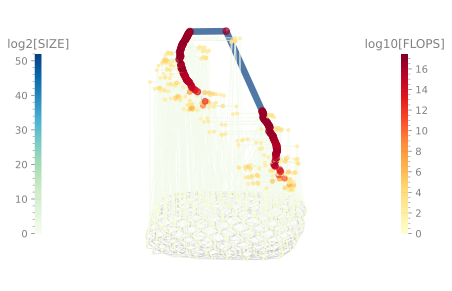

(<Figure size 500x500 with 3 Axes>, <Axes: >)

In [8]:
opt.tree.plot_tent(order=True)

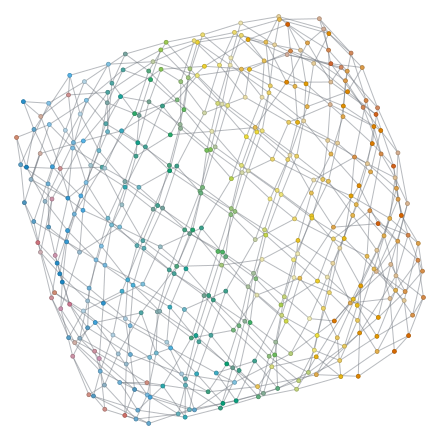

In [9]:
tn = rehs['tn']
tn.draw(tn.tags, legend=False, layout='neato')